# Simple implementation of deBruijn graph

Implementation of simple deBruijn graph for single read. Fucntion receives a read (string) and k-mer lenght, and returns a dictionary of tuples. Keys in the dictionary are edges (k-mers), and for every key values are his left and right k-1-mer stored as tuples.

In order to avoid checking if key exists and if yes create a new key, we use pythons defaultdict. In this implementation we are not interested in storing edge weights, we can use dictionaries (same k-mer will collapse into single dictionary key).

In [1]:
from collections import defaultdict

def deBruijnize(read, k=3):
    graph=defaultdict(str)
    nodes = set()
    for i in range(0,len(read)-(k-1)):
        graph[read[i:i+k]]=(read[i:i+k-1], read[i+1:i+k]) # key is k-mer, and values are it's left and right k-1-mer
        nodes.add(read[i:i+k-1])
        nodes.add(read[i+1:i+k])
    return graph, nodes

In [2]:
deBruijnize('ACGCGTCG')

(defaultdict(str,
             {'ACG': ('AC', 'CG'),
              'CGC': ('CG', 'GC'),
              'CGT': ('CG', 'GT'),
              'GCG': ('GC', 'CG'),
              'GTC': ('GT', 'TC'),
              'TCG': ('TC', 'CG')}),
 {'AC', 'CG', 'GC', 'GT', 'TC'})

### Visualizing graphs

For graph visualisation we use [graphviz](http://graphviz.org/) package. If you use pip you can install it by following [installation manual](https://graphviz.readthedocs.io/en/stable/manual.html#installation) or with conda by typing !conda install graphviz -y && !conda install python-graphviz -y in your notebook (or terminal but without '!').

Instructions on baseic graphviz commands are provided in the [user manual](https://graphviz.readthedocs.io/en/stable/manual.html#). We do so by creating a graphviz directeg graph object, then iterate through our dictrionary of edges (and connecting nodes). In each iteration we add edge in graph. Edge method in graphviz receives two arguments, source and synk. Since source and synk for each edge are stored in tuple, by using * operator we can do tuple unpacking.

In [3]:
import graphviz

def to_dot(read, weights=False):
        g = graphviz.Digraph(comment='DeBruijn graph') # creating a graphviz object
        graph, nodes = deBruijnize(read)
        for edge in iter(graph.keys()):
            # tuple unpacking; 
            g.edge(*(graph[edge])) # pythonic way of writing g.edge(graph[edge][0], graph[edge][1])
        return g

In [4]:
g=to_dot('ACGCGTCG')

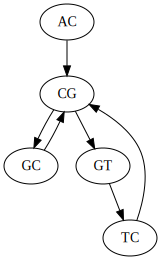

In [5]:
g

### Alternative way of representing DeBruijn graphs

We can also represent DeBruijn graphs as a set of nodes, and list of edges, where every edge is a tuple.

In [6]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [7]:
nodes, edges = de_bruijn_ize("ACGCGTCGAC", 3)


In [8]:
nodes

{'AC', 'CG', 'GA', 'GC', 'GT', 'TC'}

In [9]:
edges

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG'),
 ('CG', 'GA'),
 ('GA', 'AC')]